# Overview
This notebook is our submission to the "case study" midterm for the "Statistical Techniques" course, Innopolis University 2024. The authors are: 

1. Ayhem Bouabid [@ayhem18](https://github.com/ayhem18)
2. Amine Trabelsi [@Amine Trabelsi](https://github.com/Amine-Trabelsi?tab=overview&from=2024-01-01&to=2024-01-31)

E-commerce is indeed one of the most prominent and rapidly growing industries. It is only normal to feel curious about the different factors that affect

# Environment set up 
Please make sure to read all the run_instructions.md file before running the code.

## Important Note: 
Most of the code was written in seperate python scripts 
1. to avoid creating an extremely lengthy notebook 
2. focus on our comments and insights

In [2]:
from src.data_preparation import prepare_data
prepare_data()

Downloading...
From (original): https://drive.google.com/uc?id=1MrgVczAKBKCPYnTXOWyieeOSDwM-ijUs
From (redirected): https://drive.usercontent.google.com/download?id=1MrgVczAKBKCPYnTXOWyieeOSDwM-ijUs&confirm=t&uuid=21c07840-8e00-4f93-aa8c-66791f13c20e
To: C:\Users\bouab\DEV\Ecommerce_case_study\data\archive.zip
100%|██████████| 44.7M/44.7M [00:04<00:00, 9.62MB/s]


# Direction 1: Product Popularity 
The first direction is to analyze the product popularity trying to discover any underlying patterns and developping certain hypotheses concerning the products popularity. 

## EDA: Products from a popularity perspective

In [3]:
import src.products_analysis as pa
order_items_df = pa.read_item_order_df()
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


After reading the data, we can know determine the number of times each product was ordered / purchased

In [4]:
order_items_count = pa.prepare_item_orders(order_items_df=order_items_df)
order_items_count.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,rank,count
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.00,1,527
619,016ff85737c2072ab00a705cd8f87799,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-09 11:19:25,75.0,20.02,1,527
643,017b1d6881222283afdc50baf3dcb0d5,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-15 02:10:45,69.9,17.40,1,527
1172,02b939dcd55f2b17680e10690deb08b5,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-08-11 11:30:16,75.0,13.08,1,527
1173,02b939dcd55f2b17680e10690deb08b5,2,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-08-11 11:30:16,75.0,13.08,1,527


In [5]:
order_items_count.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,rank,count
14635,2154126e5b702c936d6507a6c20bd73d,1,6ca99f05e9c1952a6597264e87f01378,70a12e78e608ac31179aea7f8422044b,2018-06-25 12:58:40,185.00,20.86,32947,1
78116,b1c868aa288ab0e4006db84876398e68,1,6ca54e191592a843087a042b0665d7ef,c5f7feb04a6a1fb3596322bfc3cf1917,2018-08-08 20:25:16,189.00,33.62,32948,1
97534,dd44ffc289cdf93e89ac256b6e478366,1,6ca5428af5edb5066b1966ad58501b60,13c2ed7698b3ca92dad49e849219da59,2018-05-09 23:10:09,70.00,9.44,32949,1
56084,7f9230d9db6715e755cc320e1a6b2436,1,6ca32b4631431cb1fe976880797a0f5c,66922902710d126a0e7d26b0e3805106,2018-05-04 08:15:17,130.00,18.79,32950,1
110888,fbf3da6fe82010412982890b0c57e532,1,fffe9eeff12fcbd74a2f2b007dde0c58,7299e27ed73d2ad986de7f7c77d919fa,2018-05-18 17:58:18,249.99,53.88,32951,1


As we can see now, with simple data aggregation techniques, we have the number of times each product was purchased as well as its popularity ranking: the "count" and "rank" columns respectively.

Let's investigate the product popularity further

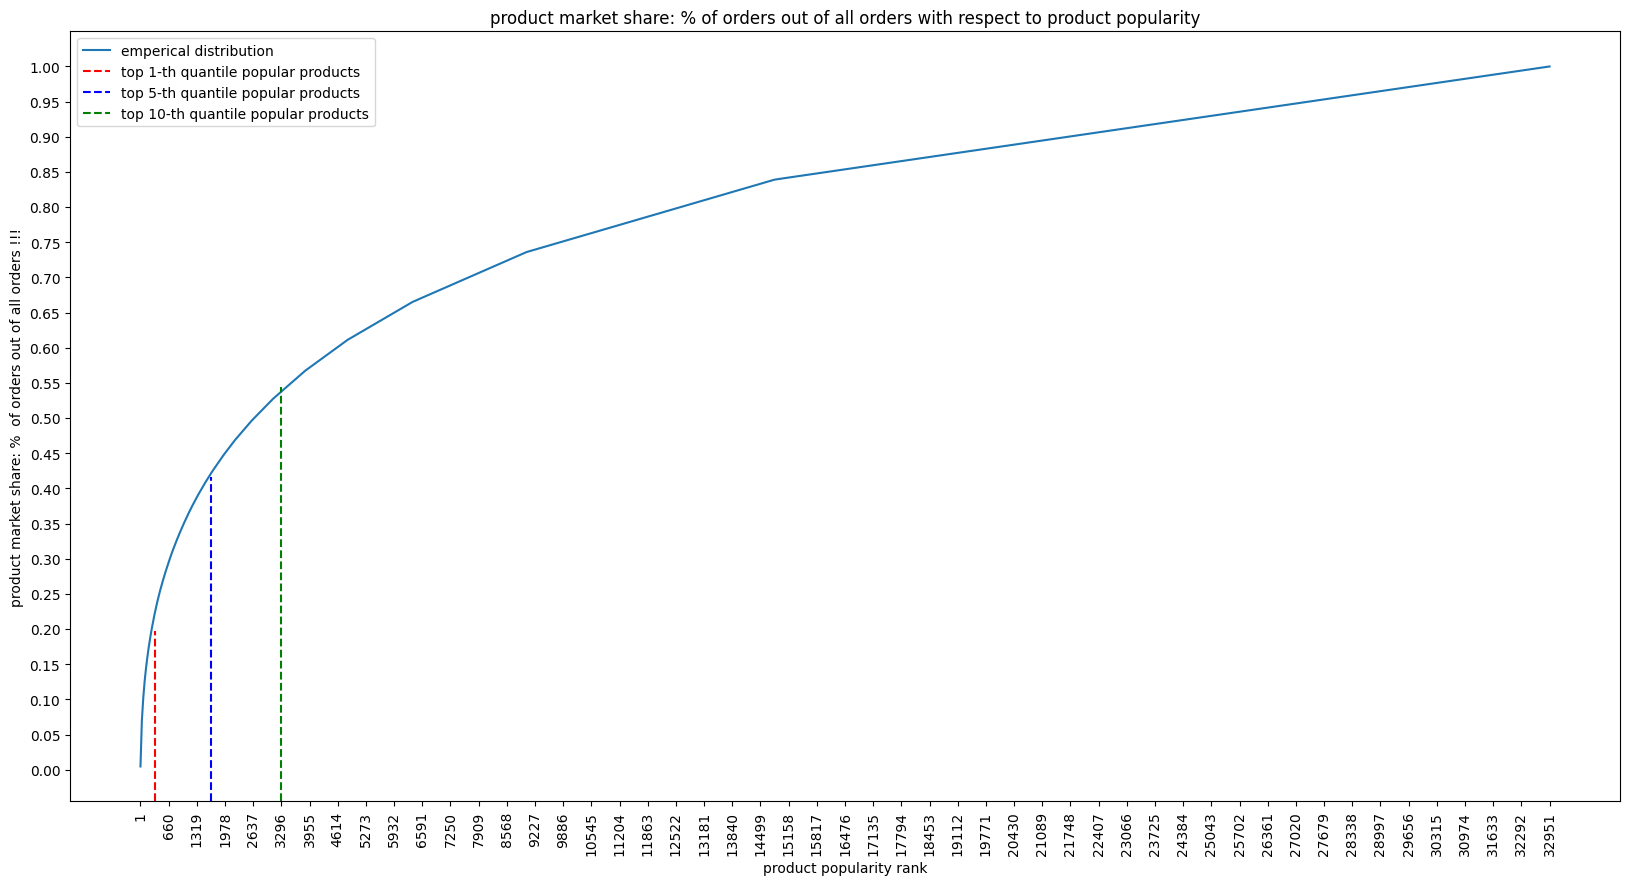

In [6]:
import src.products_analysis as pa
qx, qy = pa.display_product_orders_skewness(order_item_count=order_items_count, figsize=(20, 10))

OH ! who would expect such a skewed distribution of products. The plot on the cell above demonstrates that a small fraction of products occupy the majority of the market share.

Let's get the exact numbers !!

In [7]:
# the number of unique products
import numpy as np
num_unique_products = len(np.unique(order_items_count['product_id']))
for x, y in zip(qx, qy):
    print(f"the {x} most popular products (out of {num_unique_products} products) occupy { round(y* 100, 2)} % of the market share")

the 330 most popular products (out of 32951 products) occupy 22.12 % of the market share
the 1648 most popular products (out of 32951 products) occupy 42.13 % of the market share
the 3296 most popular products (out of 32951 products) occupy 53.78 % of the market share


## Decision:
Given the extreme skewness of the products / orders data, we will focus only on the most popular $5\%$ of products. (which occupy around 42\% of the total orders)

In [8]:
# filter the orders to keep only the top products
top_order_item_df = pa.filter_order_item_csv_top_products(order_item_count=order_items_count, quantile_rank=qx[1])

In [9]:
# read the products dataframe (the function translates some of the text from Portunguese to English, so it might take few seconds...)
products_df = pa.read_products_df()
# filter the products themselves
top_products_df = pa.prepare_products_df(top_products_order_item_df=top_order_item_df, products_df=products_df)

## EDA: products from features perspective

In [10]:
top_products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,count
638,aca2eb7d00ea1a7b8ebd4e68314663af,decoration,44.0,903.0,6.0,2600.0,527
476,99a4788cb24856965c36a24e339b6058,bed,54.0,245.0,1.0,1383.0,488
664,422879e10f46682990de24d770e7f83d,garden,56.0,348.0,2.0,1550.0,484
1502,389d119b48cf3043d311335e499d9c6b,garden,59.0,341.0,2.0,1750.0,392
242,368c6c730842d78016ad823897a372db,garden,57.0,366.0,2.0,1650.0,388


As we can see we have 7 features associated with each product: 
1. product id 
2. product category
3. the length of the product name 
4. the length product description  
5. product number of photos
6. product weight
7. 'count' : added previously, the number of times the product was ordered

The most promising features are: 
* product category name
* product_photos_qty

### Product Category

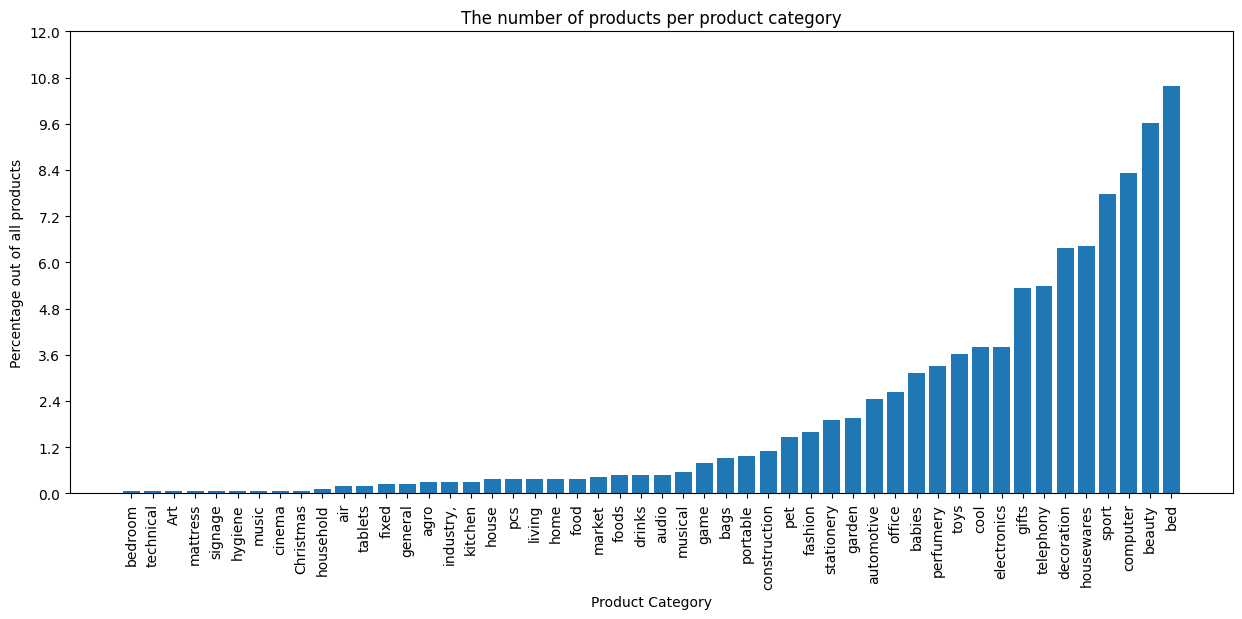

In [11]:
pa.display_product_category_distribution(top_products_df)

Although the distribution is relatively skewed, it is not as skewed as the orders distribution. We can see that "bed", "beauty" and "computer" products are the most popular categories. 

Nevertheless, we have a relatively large number of categories with high number of products as well: 

8 categories with each occupying at least $5\%$ of the products. Analysing categorical data with such a high number of unique values (useful / frequent unique values !!) is definitely not the most promising direction

### Number of pictures and product popularity ?
How does the number of pictures affect the product popularity ? 

Are products with multiple pictures more popular (on average) than those with only one picture ? 

In other words, are products with multiple pictures bought more often than their counterparts with only one picture ?

out of the top products, 814 have only 1 photo attached, 819 have at least 2 photos attached


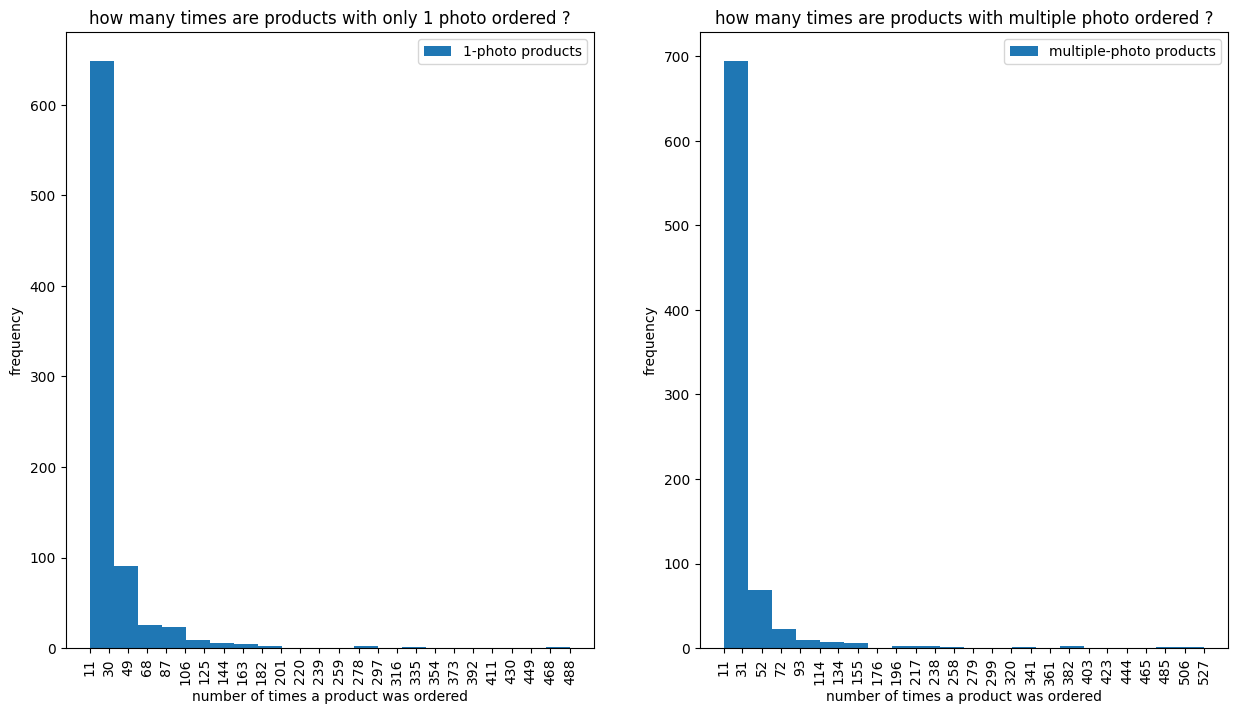

In [12]:
p0, p1 = pa.analyze_products_num_photos(top_products=top_products_df, figsize=(15, 8))

The plots above display 3 important pieces of information:

1. Even among the top products the distribution is still skewed, only very few products are on very high demand (400 + orders), while most products are ordered around between 10 and 50 times
2. According to observation number 1, The distribution above is very unlikely to be normal !!
3. On a first glance the distrubtion of number of orders between products with only one photo and multiple photos is very similar.

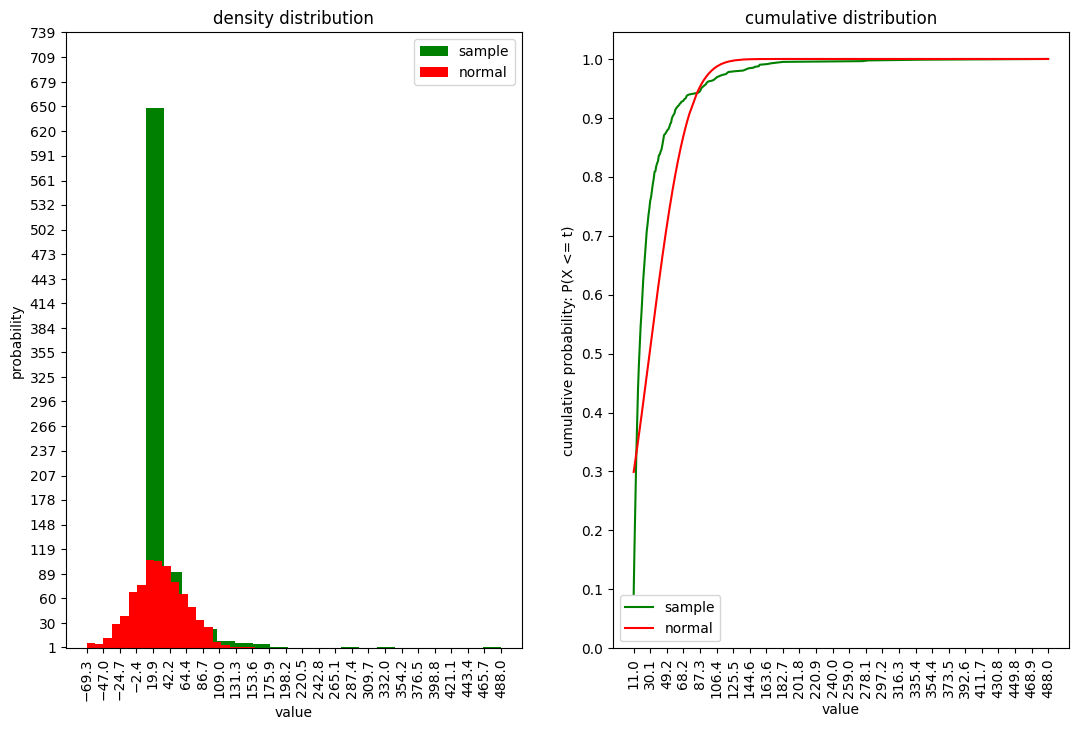

In [13]:
import src.stats_utils as su
import importlib
importlib.reload(su)
# products with only 1 photo
p0_pvalue = su.test_sample_normal_distribution(p0['count'], display=True)

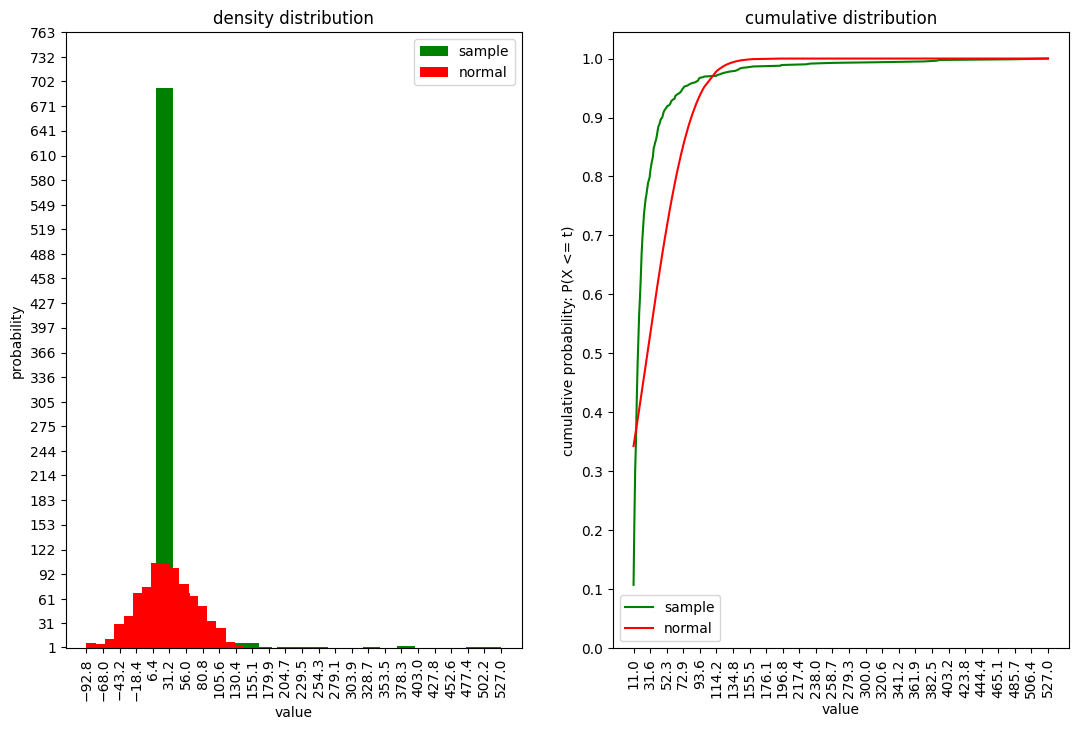

In [14]:
p1_pvalue = su.test_sample_normal_distribution(p1['count'].values, display=True)

In [15]:
print(f"The p value for normality test on the first distribution  is: {p0_pvalue}")
print(f"The p value for normality test on the second distribution  is: {p1_pvalue}")

The p value for normality test on the first distribution  is: [4.138662606840435e-65]
The p value for normality test on the second distribution  is: [1.9047094032566232e-86]


The plots along with the ***Kolmogorov-Smirnov*** test proves that both distributions cannot be considered normal. 

Thus, we will proceed with a non-parameteric test. Our test of choice is 

In [16]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(x=p0['count'].values,
                     y=p1['count'].values,
                     alternative='less')
print(f"p value of the Mann White test with the alternative: the median of 'x' is greater than 'y' is equal to: {p}")

p value of the Mann White test with the alternative: the median of 'x' is greater than 'y' is equal to: 0.994240868875342


## Direction Conclusion:
Although counter-intuitive, The hypothesis test confirms that products with only one picture are ordered more often than those with multiple pictures. Thus, it might be more lucrative for sellers to focus on other factors such as: 

1. better product description  
2. focus on more popular product categories
3. better photo quality ??

## Direction Theorey and Limitations
### Theory:

Let's start with the normality test, we use the Kolmogorov-Smirnov Goodness-of-Fit Test. It is based on several assumptions: 

1. The scale of measurement is at least ordinal: this assumption will be satisfied for all samples
2. The distribution is continuous: We test only samples with continous distribution
3. The test requires a large number of samples (otherwise the test might not have significant statistical power). The code was written to raise an error if the sample size is less than  n = 30. (n = 30 was chosen because we $n = 30$ to apply the Central Limit Theorem.)

The business goal of this direction was to understand effect of having multiple photos on the product popularity. Denoting by : 
* P1: the distribution of the number of times products with only one picture were ordered
* P2: the distribution of the number of times products with multiple pictures were ordered
The non-technical problem can be rewritten in statistical terms: is the central tendency of P1 and P2 the same, or significantly different ?

To answer this question: we use the non-parametric test:  "Wilcoxon rank-sum" test, also known as "Mann–Whitney U" test as our data follows the general assumptions: 

1. The observations are independent from each other
2. The distribution are non-normal (As demonstrated above)
3. The data is at least ordinal: in our case the data are continous and comparable


The theoretical details can be found in the following [textbook](https://spada.uns.ac.id/pluginfile.php/221008/mod_resource/content/1/ProbabilityStatistics_for_EngineersScientists(9th_Edition)_Walpole.pdf) chapter 16, section 3.


### Limitations: 
Although the statistical test demonstrates that the central tendencies are not the same, the conclusion can be invalidated for several reasons: 

1. It is possible that this difference in distributions might be explained by other factors absent in the data. For example, it is possible that most products with only one picture belong to super popular categories / manifactured by popular and trustworthy brands, while the majority of products with multiple products are manifactured by less popular brands. Discovering such factors (if they exist) is beyond the scope of this case-study.

2. The assumption of independence is only natural for our case here. Nevertheless, we cannot be certain that the popularity of one product is completely independent of the popularity of another. 

# Direction 2: Customers
Can we extract some underlying spending / shopping habits per customer ?

## EDA: customers from a spending perspective ?
Is the average spending of a single customer higher across regions ?

In [17]:
import src.customers_analysis as cs
customers_df = cs.read_customer_data()
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
cs.unique_elements_per_column_customers(customers_df=customers_df)
# let's extract the cool custoemrs
cool_customers = cs.get_cool_customers(customers_df=customers_df)
cool_customers.head()

##########
the column: 'customer_id' column has 99441 unique values
##########
the column: 'customer_unique_id' column has 96096 unique values
##########
the column: 'customer_zip_code_prefix' column has 14994 unique values
##########
the column: 'customer_city' column has 4119 unique values
##########
the column: 'customer_state' column has 27 unique values


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,count
910,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,17
3718,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,17
3078,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,17
2294,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,17
5319,f5188d99e9281e214a4a7d1b139a8229,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,17


In [19]:
cs.customers_repeated_purchases(customers_df=customers_df)

Let's consider customers that used the platform multiple times
out of 96096 customers, only 2997 ordered at least 2 times:3.1188 % of the customer base
out of 96096 customers, only 19 ordered at least 4 times:0.0198 % of the customer base


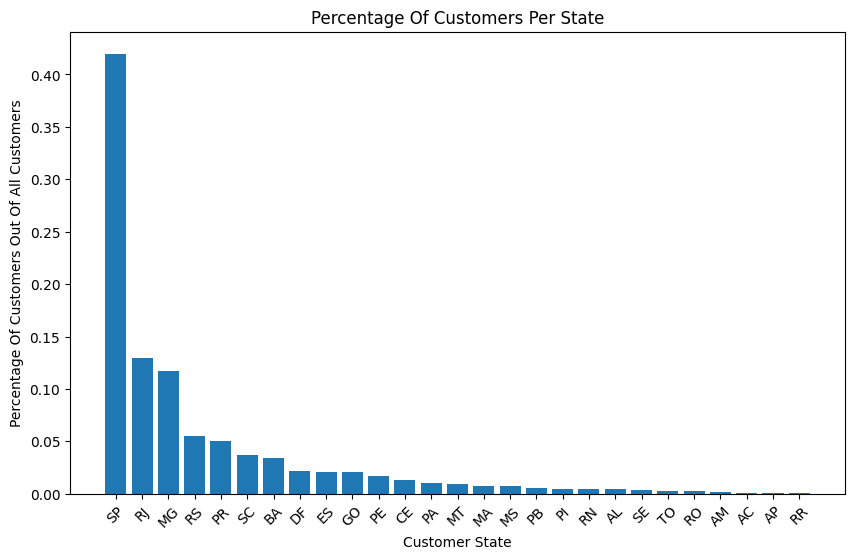

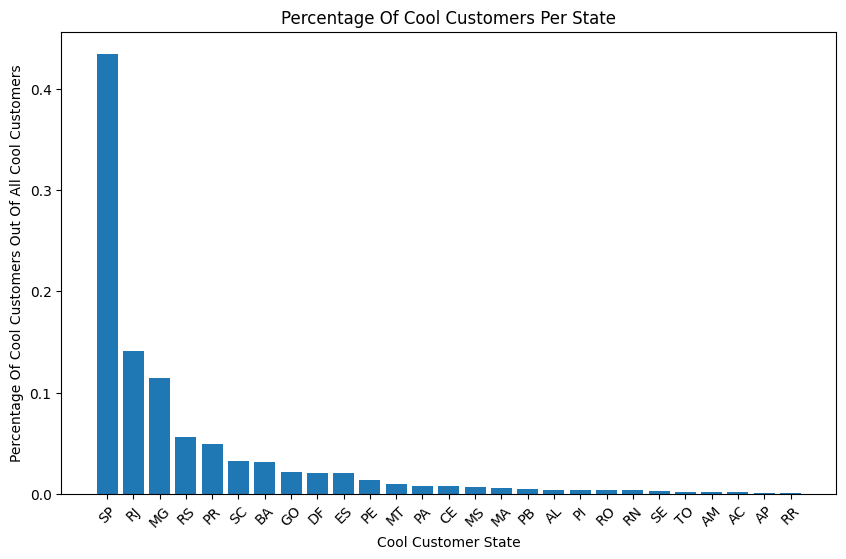

In [20]:
importlib.reload(cs)
cs.visualize_customers_distribution_per_state(customer_df=customers_df, figsize=(10, 6))
cs.visualize_cool_customers_distribution_per_state(cool_customers=cool_customers, figsize=(10, 6))

The analysis above leads to two important observations: 

1. The customers data is too scattered across different customers to possibly extract meaningful insights. We cannot possibly infer any spending habits or trends by individual customer if they use the platform once...

In fact, the miniscule number of customers that only order once signals a potential issue with the platform; mainly from the angle of  ***customer retention***.   

2. The majority of customers (either cool customers or any customers in general) reside in one of the 3 major states: 

* Sau Paulo (SP)
* Rio De Janeiro (RJ) 
* Minas Gerais (MG)

# Direction 3: Sellers
What factors influence sellers' profits ? One subsequent question is: How can we compare / estimate the sellers' profits. According to the data description: 

1. 'olist_order_items_dataset.csv' file contains the information about the price and the shipping costs for each product 
2. 'olist_order_payments_dataset.csv' files contains the information paid by a customer at each order.

This information as it is cannot be used to calculate the seller's profit margin (which is only natural since no seller would willingly share their profit margins to the public...) 

Thus, our only way to compare sellers' profits is through their prices.

In [21]:
import src.sellers_analysis as sa
sellers_df = sa.read_seller_csv()
order_items_df = sa.read_order_items_csv()
multi_seller_products = sa.analyze_product_per_seller(order_item_df=order_items_df, display=True)

The total number of products sold: 32951
The number of products sold by at least 2 sellers: 1225
That's only: 3.7176 %


The output above highlights an important information: 

1. Most products are sold by exactly one seller (more than $96\%$ to be precise...)
2. Given a product, we might not have enough sellers to compare their prices...
3. Thus, we will aggregate with the 'state' information. 

To elaborate more on the 3rd point, we will proceed as follows: 
1. Given 2 states: (s1, s2), we will extract all the products that are sold by at least 1 seller from each state: p1, p2.... p_n
2. For each product, calculate the price when sold by sellers from each of the 2 state: $avg\_price\_s1$, $avg\_price\_s2$
3. After iterating through all products, we know have a list of paired observations: 

$$
[(avg\_price\_s1\_product_1, avg\_price\_s2\_product_1), (avg\_price\_s1\_product_2, avg\_price\_s2\_product_2) ... ]
$$

Since most customers are from 'SP', 'RJ', we will focus on these 2 states.

In [22]:
multi_seller_orders = sa.prepare_multi_seller_price_data(order_item_df=order_items_df, 
                                                        sellers_df=sellers_df, 
                                                        multi_seller_products=multi_seller_products)

### Sao Paulo Vs Rio de Janeiro
To test whether the average price of a product by sellers in Sao Paulo and those in Rio De janeiro, we find need to investigate the distribution of the prices.

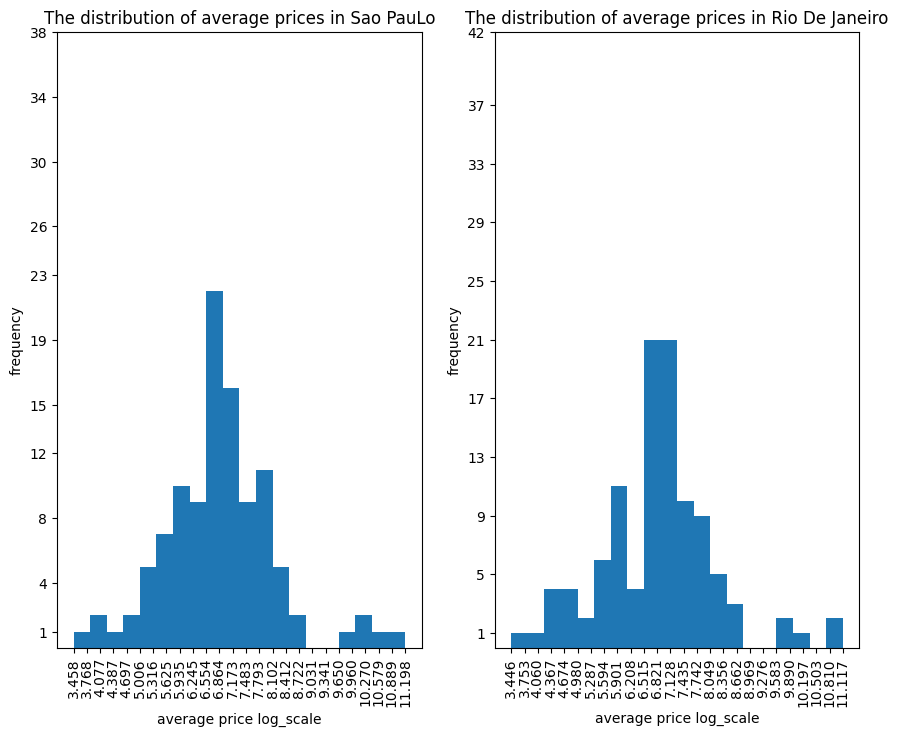

In [23]:
import src.sellers_analysis as sa
# perform the calculations needed for the pair of states (SP, RJ) , (SP, MG), (RJ, MG)
sp_rj_average_product_price = sa.average_product_price_by_state(multi_seller_orders_df=multi_seller_orders,
                                                                state1="SP", 
                                                                state2="RJ")
import importlib
# let's plot the distribution
importlib.reload(sa)
sp_ap, rj_ap = sp_rj_average_product_price['SP'], sp_rj_average_product_price['RJ'] 
sa.display_average_price_distribution(sp_ap, rj_ap, state1='Sao PauLo', state2='Rio De Janeiro', log_scale=True, figsize=(16, 8))

p value of the normality test for the 'average product prices in Sao Paulo (log scale)' is : [0.3734954596888743]


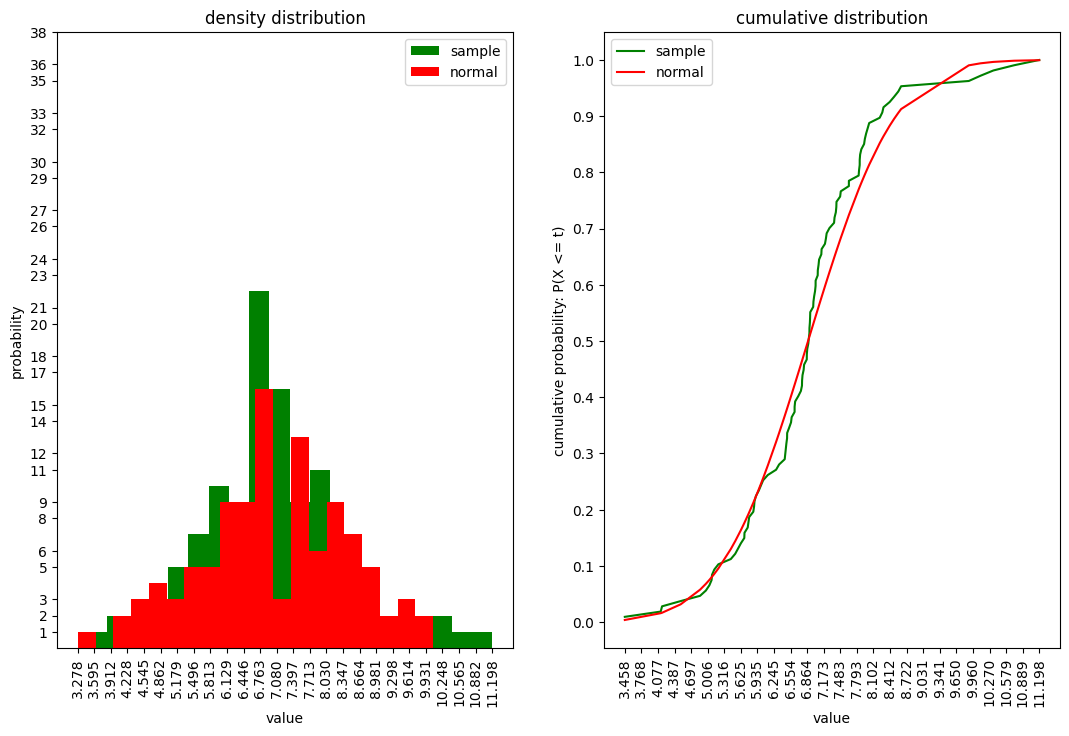

In [24]:
import src.stats_utils as su
import numpy as np
importlib.reload(su)
sp_normal_p = su.test_sample_normal_distribution(sample=np.log2(sp_ap), display=True) 
print(f"p value of the normality test for the 'average product prices in Sao Paulo (log scale)' is : {sp_normal_p}")

p value of the normality test for the 'average product prices in Rio De Janeiro (log scale)' is : [0.13131620935236876]


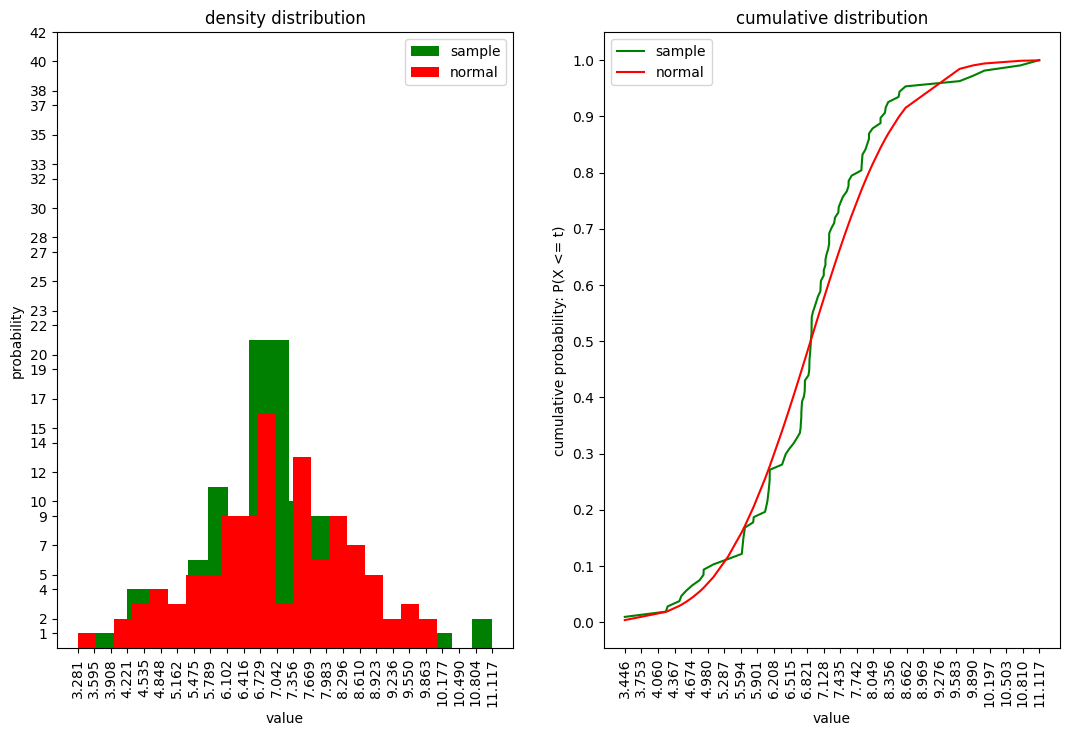

In [25]:
rj_normal_p = su.test_sample_normal_distribution(sample=np.log2(rj_ap), display=True) 
print(f"p value of the normality test for the 'average product prices in Rio De Janeiro (log scale)' is : {rj_normal_p}")

In [26]:
# we will assume that standard deviation is equal between the 2 samples
from scipy.stats import ttest_rel 
ttest_rel(a=sp_ap, b=rj_ap)

TtestResult(statistic=0.7801612923486614, pvalue=0.4370345634147691, df=106)

## Direction Conclusion
According to the t-test for paired observations, the p-value is 0.43, thus we cannot reject the null hypothesis and we can reasonably assure a customer that for a given product, the price will be (on average) the same, whether the seller is located in Sau Paulo or Rio De Janeiro

## Direction Theory and Limitations:
### Theory
The non-technical question for this direction was: Given a product, is the average price by sellers in Sao Paulo different from the average price by sellers in Rio De Janeiro. For a meaningful comparison, the prices should be associated with their prices, thus the observations are paired / dependent. We decided to apply t-test for paired observations as our data follows the required assumptions: 

1. The observations are paired (as explained above)
2. The distributions of the two samples are assumed to be normal (as demonstrated above)
3. The measurement units are assumed to be homogenous: all the prices are in the same currency / unit.

The theoretical details can be found in the following [textbook](https://spada.uns.ac.id/pluginfile.php/221008/mod_resource/content/1/ProbabilityStatistics_for_EngineersScientists(9th_Edition)_Walpole.pdf) chapter 10, section 5.

Additionally we use 2 other statistical techniques: 

* Log transform: this is a technique applied to transform seemingly non-normal data to a normal distribution by applying the log transform on each element of the sample. 
This technique was inspired from the following [article](https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/) (Power Transforms section)

* outlier removal using the iqr range: This is a popular technique where q1 and q3 are calculated and any element less than q1 - 1.5 * (q3 - 1) or larger than q3 + 1.5 * (q3 - q1) is considered an outlier. This technique is explained in the [textbook](https://spada.uns.ac.id/pluginfile.php/221008/mod_resource/content/1/ProbabilityStatistics_for_EngineersScientists(9th_Edition)_Walpole.pdf) chapter 1, section 6. 

### Limitations: 
Our of the 3 assumptions required above, the most fragile one is the normality assumption. The normality test do not reject the null hypothesis (that the data is normally distributed), however the p-value is not large enough to $100%$ be certain of the data normality. More data should be collected to answer clear the doubts about the data distribution.

# Direction 4: Delivery Time

What factors influence delivery time.
Delivery time: time taken from the moment of the order until the customer receives the product.

We wanted to test a trivial factor, that is the location of the seller based on the state.

First let us check the average delivery time of all sellers.

In [27]:
import os
import seaborn as sns
import pandas as pd

home = os.getcwd()
DATA_FOLDER = os.path.join(home, 'data')
PREPARED_DATA_FOLDER = os.path.join(home, 'prepared_data')

sellers = pd.read_csv(os.path.join(DATA_FOLDER, 'olist_sellers_dataset.csv'))
order_items = pd.read_csv(os.path.join(PREPARED_DATA_FOLDER, 'order_item_top_products.csv'))
orders = pd.read_csv(os.path.join(DATA_FOLDER, 'olist_orders_dataset.csv'))

# merge datasets
merged_data = pd.merge(sellers, order_items, on='seller_id')
merged_data = pd.merge(merged_data, orders, on='order_id')

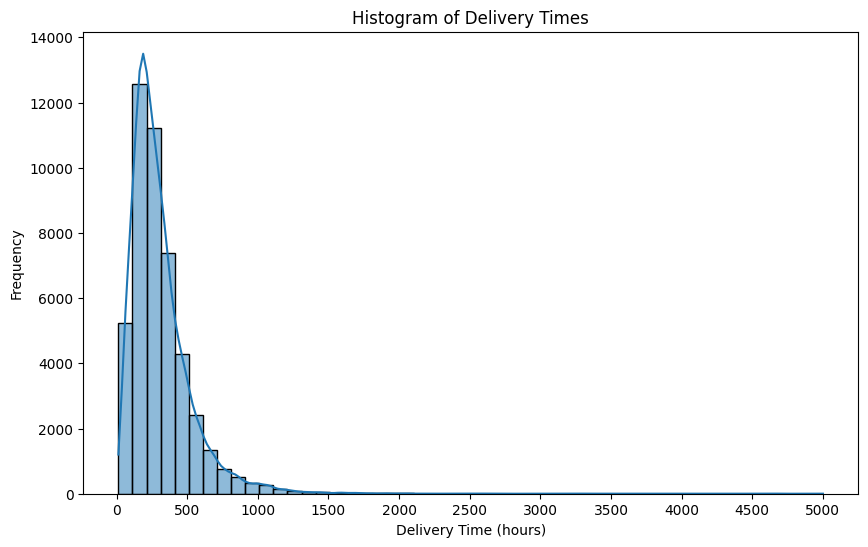

In [28]:
import matplotlib.pyplot as plt
# calculate delivery time for each order
merged_data["delivery_time"] = pd.to_datetime(merged_data["order_delivered_customer_date"]) - pd.to_datetime(merged_data["order_purchase_timestamp"])
merged_data["delivery_time"] = merged_data["delivery_time"].dt.total_seconds() / 3600

# Histogram of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['delivery_time'], bins=50, kde=True)
plt.xticks(np.arange(0, 5500, step=500))
plt.title('Histogram of Delivery Times')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.show()

 From this plot we can see that the delivery time can vary from 100 hours to even 1500 hours. With 200 hours being the most frequent average delivery time.

Now let us take a look at the average delivery time in different states. 

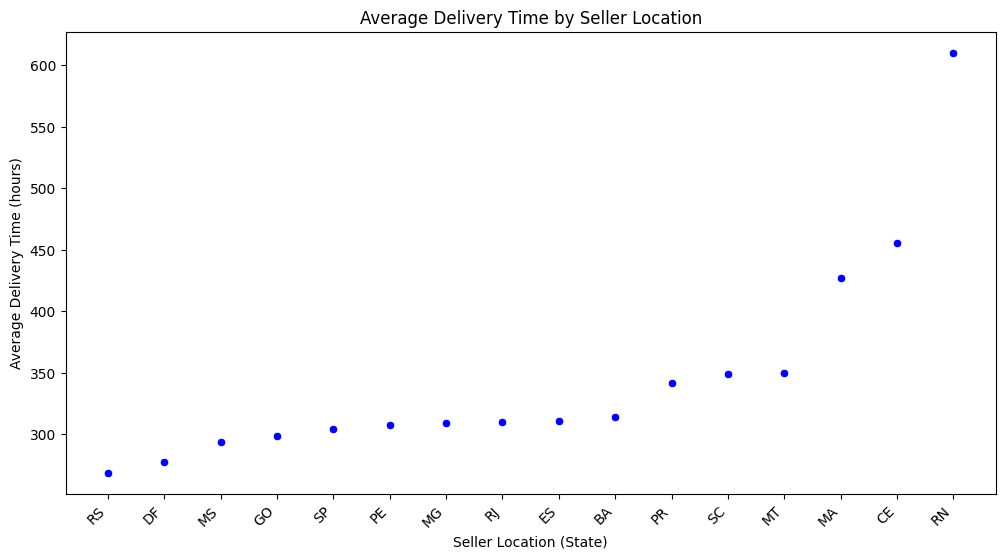

In [29]:
# Calculate the average delivery time for each seller
avg_delivery_time_by_state= merged_data.groupby('seller_state')['delivery_time'].mean().reset_index().sort_values(by="delivery_time")

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='seller_state', y='delivery_time', data=avg_delivery_time_by_state, color='blue')
plt.title('Average Delivery Time by Seller Location')
plt.xlabel('Seller Location (State)')
plt.ylabel('Average Delivery Time (hours)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

We can see that some states have a very high average delivery time compared to other states. 

To investigate this difference in delivery time, we should first find out the number of sellers of each state to make sure we have a big enough sample.

In [30]:
seller_counts = merged_data.groupby('seller_state')['seller_id'].nunique().sort_values()
seller_counts

seller_state
ES      1
MA      1
MS      1
MT      1
RN      1
CE      2
PE      2
BA      3
DF      7
GO      7
RS     19
SC     35
RJ     43
MG     63
PR     70
SP    419
Name: seller_id, dtype: int64

We can see from the data that some states only have one seller. Therefore, to get more accurate results we should only analyse states with high number of sellers. We will test the top three cities: SP, PR, and MG.

To test the hypothesis we are going to use a two-sample t_test. Therefore, we need to make sure the data is normalized.

San Paolo(SP):

[0.513549716370058]

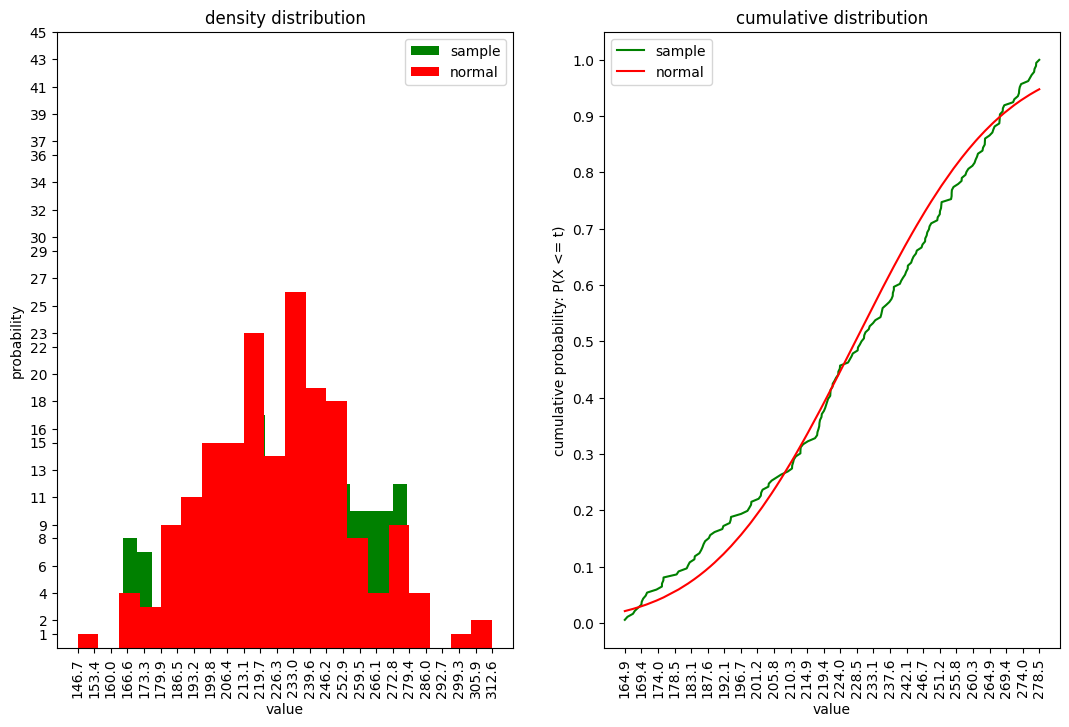

In [31]:
from src.stats_utils import remove_outliers, test_sample_normal_distribution

# load SP data
df_sp = merged_data[merged_data['seller_state'] == 'SP'].groupby('seller_id')['delivery_time'].mean().reset_index()
df_sp.rename(columns={'delivery_time': 'average_delivery_time_SP'}, inplace=True)

# remove outliers
sp_avg_dt = remove_outliers(df_sp['average_delivery_time_SP'].dropna().sort_values())
test_sample_normal_distribution(sp_avg_dt, random_state=42, display=True)

P-value ~ 0.5 therefore it is safe to assume that the data is normally distributed.

MG

[0.9532746035485491]

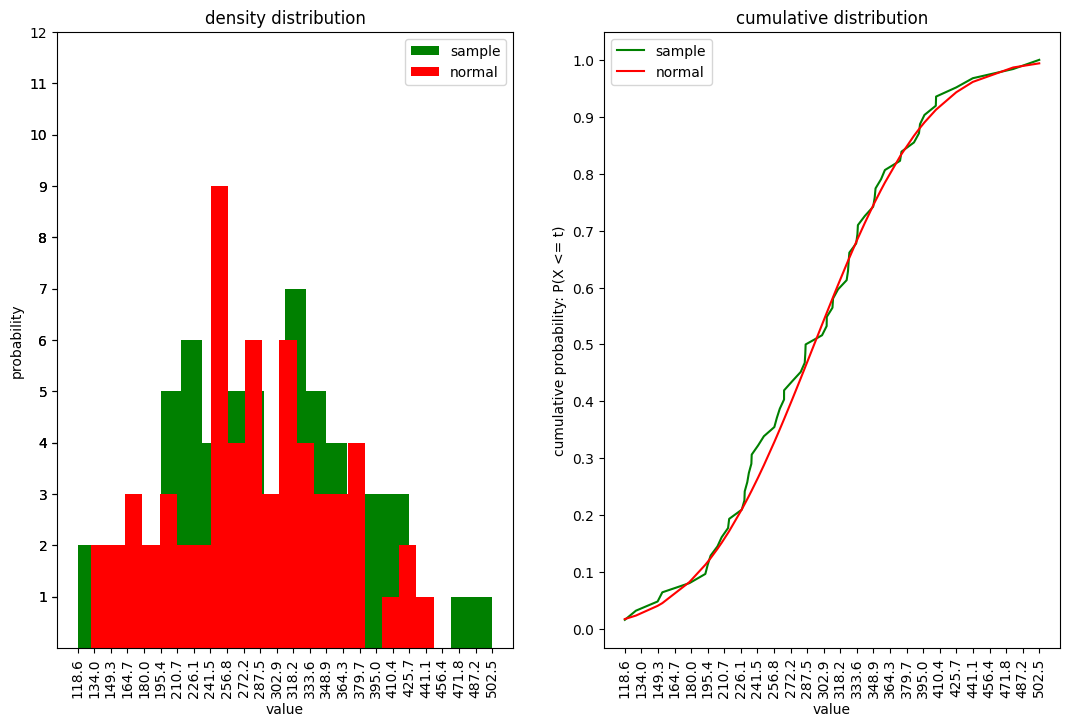

In [32]:
# Create second dataframe for sellers from state MG
df_mg = merged_data[merged_data['seller_state'] == 'MG'].groupby('seller_id')['delivery_time'].mean().reset_index()
df_mg.rename(columns={'delivery_time': 'average_delivery_time_MG'}, inplace=True)

mg_avg_dt = df_mg['average_delivery_time_MG'].dropna().sort_values()
test_sample_normal_distribution(mg_avg_dt, random_state=42, display=True)

Moreover, this data shows that for state MG the data is normal.

PR

[0.8150992093802347]

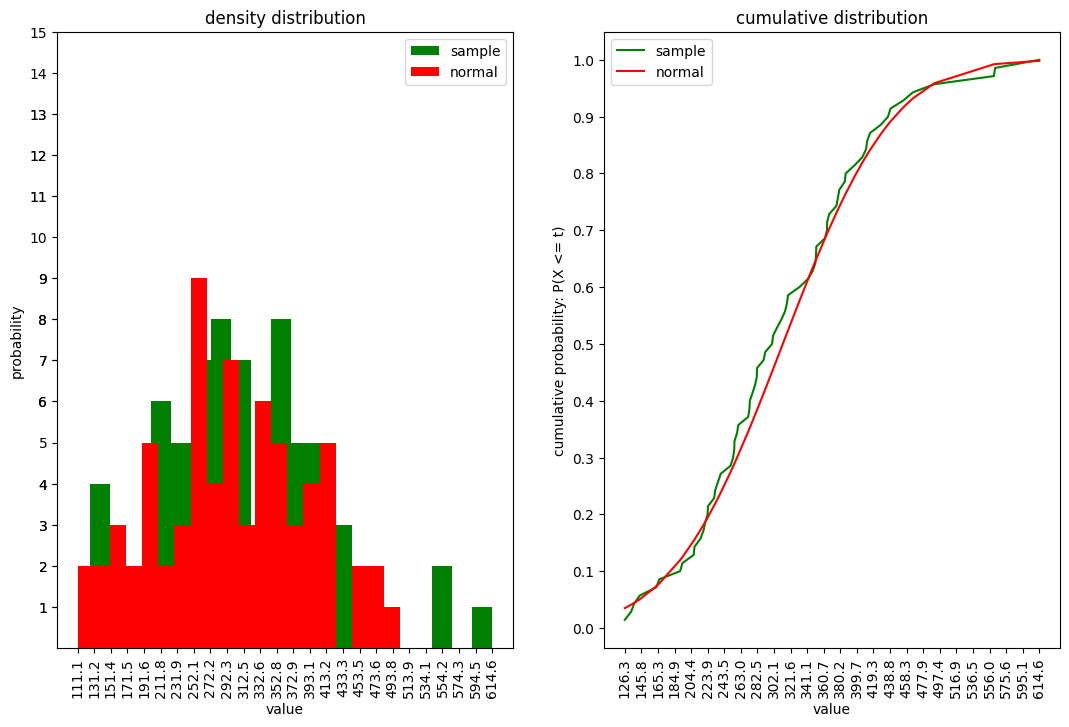

In [33]:
df_pr = merged_data[merged_data['seller_state'] == 'PR'].groupby('seller_id')['delivery_time'].mean().reset_index()
df_pr.rename(columns={'delivery_time': 'average_delivery_time_PR'}, inplace=True)

pr_avg_dt = df_pr['average_delivery_time_PR'].dropna().sort_values()
test_sample_normal_distribution(pr_avg_dt, random_state=42, display=True)

Same here, data from PR is normal.

Now we test the difference between the average delivery time in SP and PR.

In [34]:
from scipy.stats import ttest_ind

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(sp_avg_dt, pr_avg_dt, equal_var=False, alternative='greater' )

print("Two-Sample T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

Two-Sample T-Test Results:
T-Statistic: -6.706006605807289
P-value: 0.9999999982501917


* By setting the alternative to 'greater' we can see, that the average delivery time of sellers in Sao Paulo is higher than the average delivery time for sellers in Rio De 
Janeiro. This might be explained by the significantly larger number of sellers and customers in Sao Paulo than in Rio De Janeiro. 

* It might be a smart business move of OList to ask the shippers to priritize ships coming from and to Sao Paulo due to the high traffic (lower average time might lead to even more customers...)

Now we test the difference between the average delivery time in PR and MG.

In [35]:
from scipy.stats import ttest_ind

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(pr_avg_dt, mg_avg_dt, equal_var=False)

print("Two-Sample T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

Two-Sample T-Test Results:
T-Statistic: 1.1271928469471948
P-value: 0.26175270745994694


The statistical test confirms that there is no significant difference in the average delivery time for sellers in Rio De Janeiro and those in Minas Gerais. This further aligns with the interpretation above since MG and RJ happen to accomodate significantly less customers and sellers than SP, which might be lead to less resource allocation.

## Direction Theory and Limitations
### Theory
The non-technical question for this direction is as follows: Is there significant difference in average delivery time for sellers in different 2 states. We picked 2 pairs of states that represent the states with the largest number of sellers : SP -> RJ -> MG. This question translates in statistical terms to: Denoting:  

1. P1 the distribution of average delivery time of sellers residing in the first state 
2. P1 the distribution of average delivery time of sellers residing in the second state 

is there a significant difference between the mean of those 2 distributions. We answered this question using the t-test as our data satisfies the main assumptions: 

1. the data is continous (some deliveries took as long as 5000 hours...)
2. The data is normally distributed (demonstrated above)
3. The observations from the 2 samples are independent: The average delivery time by seller ensures that the observations are independent since a seller can reside in only one state (at least from the given data).

### Limitations
The main possible limitation is the significance difference between the number of samples associated  with 'SP' is and those associated with 'RJ' and 'MG'. (420, 70 and 63) respectively. The average delivery for RJ and MG is definitely noisier than the estimation for SP and might be more optimistic. This issue can potentially mitigated by acquiring more data about the sellers in RJ and MG respectively.